In [37]:
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
import pandas as pd

 Using those parameter that choose or defined by Keras-tuner And our goal to 
 solve regression problem using those parameter

In [38]:
df = pd.read_csv("Real_Combine.csv")

In [39]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [40]:
# Specify X and Y
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:

# Initialising the ANN
classifier = Sequential()

In [43]:
# Now I choose parameter 
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 192, kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))

In [44]:
# 2.
classifier.add(Dense(units = 256, kernel_initializer = 'he_uniform',activation='relu'))


In [45]:
# 3.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [46]:
# 4.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [47]:
# 5.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [48]:
# 6.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [49]:
# 7.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [50]:
# 8.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [51]:
# 9.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [52]:
# 10.
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))


In [53]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

In [54]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [55]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 192)               1728      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               49408     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [58]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 50)

Epoch 1/50
59/59 [==============================] - 1s 9ms/step - loss: 61.4256 - mean_absolute_error: 61.4256 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 64.8137 - mean_absolute_error: 64.8137 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/50
59/59 [==============================] - 0s 8ms/step - loss: 58.9971 - mean_absolute_error: 58.9971 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/50
59/59 [==============================] - 0s 8ms/step - loss: 55.9839 - mean_absolute_error: 55.9839 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/50
59/59 [==============================] - 0s 8ms/step - loss: 56.2053 - mean_absolute_error: 56.2053 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 63.9329 - mean_absolute_error: 63.9329 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/50
59/59 [==============================] - 

In [70]:
# predict the target on the testing dataset
predict_test = classifier.predict(X_test) 
predict_test

array([[ 70.11507 ],
       [154.33813 ],
       [239.40314 ],
       [144.25781 ],
       [226.5774  ],
       [144.82187 ],
       [ 51.767082],
       [109.69374 ],
       [ 48.406746],
       [ 50.434486],
       [201.32793 ],
       [ 48.495884],
       [125.79658 ],
       [204.9522  ],
       [ 58.794773],
       [112.25172 ],
       [177.48325 ],
       [112.67671 ],
       [ 97.45266 ],
       [ 53.72927 ],
       [ 61.952885],
       [ 60.72307 ],
       [112.364105],
       [ 64.385605],
       [ 55.167934],
       [103.32217 ],
       [106.10934 ],
       [ 49.999157],
       [110.55997 ],
       [115.34762 ],
       [103.37152 ],
       [105.31823 ],
       [199.07104 ],
       [ 58.29614 ],
       [174.27008 ],
       [204.47047 ],
       [163.81961 ],
       [188.12502 ],
       [176.9264  ],
       [166.5441  ],
       [109.69374 ],
       [179.21011 ],
       [ 50.051937],
       [197.62086 ],
       [ 61.41414 ],
       [ 91.89487 ],
       [ 55.44638 ],
       [202.5

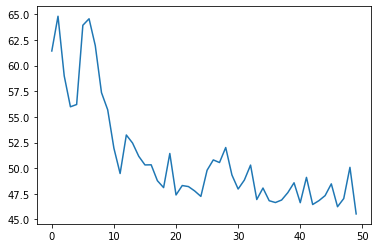

In [79]:
from matplotlib import pyplot


# plot metrics

pyplot.plot(model_history.history['mean_absolute_error'])
pyplot.show()

# as we see our mae is lowest 